# Principal Component Analysis (PCA) 
Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a set of possibly correlated variables into a smaller set of uncorrelated variables called principal components.

It’s widely used for exploratory data analysis, visualization, and feature reduction.

# Purpose
Reduce the dimensionality of data while retaining most of the variance.

Identify patterns and relationships in high-dimensional data.

Remove redundancy (correlated variables).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA



In [2]:

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names



In [3]:
# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Handle missing values (if any)
df.dropna(inplace=True)



In [4]:
# ========================
# Normalization (Min-Max)
# ========================
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(df[feature_names])
df_normalized = pd.DataFrame(X_normalized, columns=feature_names)



In [5]:
# ========================
# Standard Scaling
# ========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_normalized)
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)



In [9]:
# ========================
# PCA
# ========================
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame with principal components
df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca["target"] = y

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.72962445 0.22850762 0.03668922 0.00517871]


In [11]:
# Apply PCA using all components
pca_full = PCA()  # All components by default
X_pca_full = pca_full.fit_transform(X_scaled)

# Explained variance ratio and cumulative variance
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Display explained and cumulative variance
print("Explained and Cumulative Variance by Principal Components:\n")
for i, (ev, cv) in enumerate(zip(explained_var, cumulative_var), start=1):
    print(f"PC{i:2d}: Explained Variance = {ev:.4f}, Cumulative = {cv:.4f}")


Explained and Cumulative Variance by Principal Components:

PC 1: Explained Variance = 0.7296, Cumulative = 0.7296
PC 2: Explained Variance = 0.2285, Cumulative = 0.9581
PC 3: Explained Variance = 0.0367, Cumulative = 0.9948
PC 4: Explained Variance = 0.0052, Cumulative = 1.0000


# Interpretation:
The PCA results revealed that the first two principal components (PC1 and PC2) together explained approximately 95.81% of the total variance in the dataset, indicating that a large proportion of the data's structure could be captured in just two dimensions. This dimensionality reduction facilitated clear visualization and efficient classification.

In [12]:
# ========================
# Save PCA results to Excel
# ========================
output = pd.concat([df, df_scaled, df_pca], axis=1)
output.to_excel("pca_output.xlsx", index=False)
print("PCA scores and scaled data saved to pca_output.xlsx")



PCA scores and scaled data saved to pca_output.xlsx


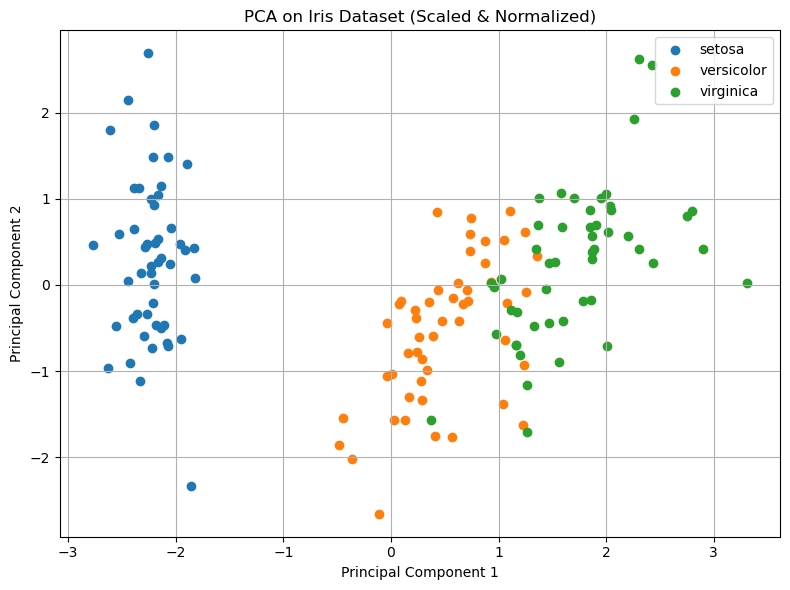

In [13]:
# ========================
# Plotting
# ========================
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(
        df_pca[df_pca["target"] == i]["PC1"],
        df_pca[df_pca["target"] == i]["PC2"],
        label=label
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.title("PCA on Iris Dataset (Scaled & Normalized)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

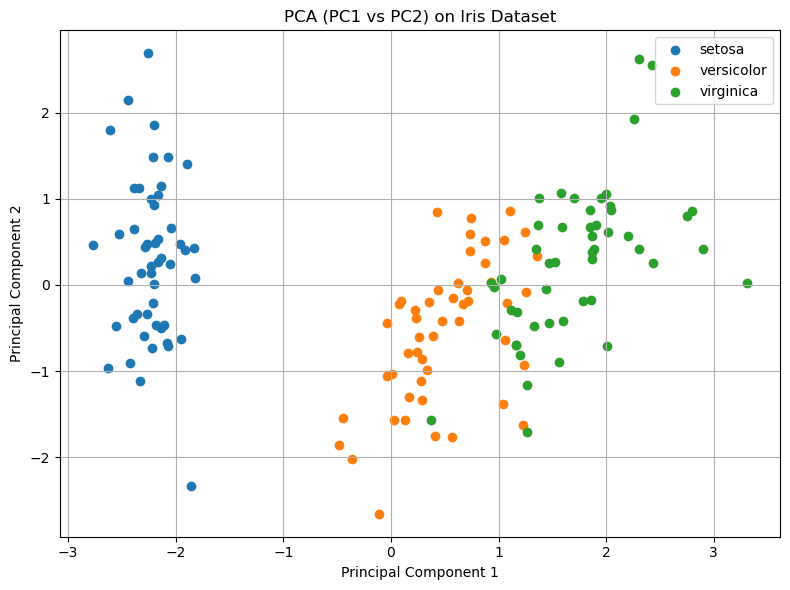

In [14]:
# ========================
# 2D PCA Plot (PC1 vs PC2)
# ========================
plt.figure(figsize=(8, 6))
for i, label in enumerate(target_names):
    plt.scatter(
        df_pca[df_pca["target"] == i]["PC1"],
        df_pca[df_pca["target"] == i]["PC2"],
        label=label
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA (PC1 vs PC2) on Iris Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretation :The  plot from PCA confirmed these findings: Setosa was distinctly separated along the first principal component, whereas Versicolor and Virginica exhibited some overlap but could still be partially distinguished along the second component. This visualization validated the effectiveness of PCA in capturing inter-species variation.

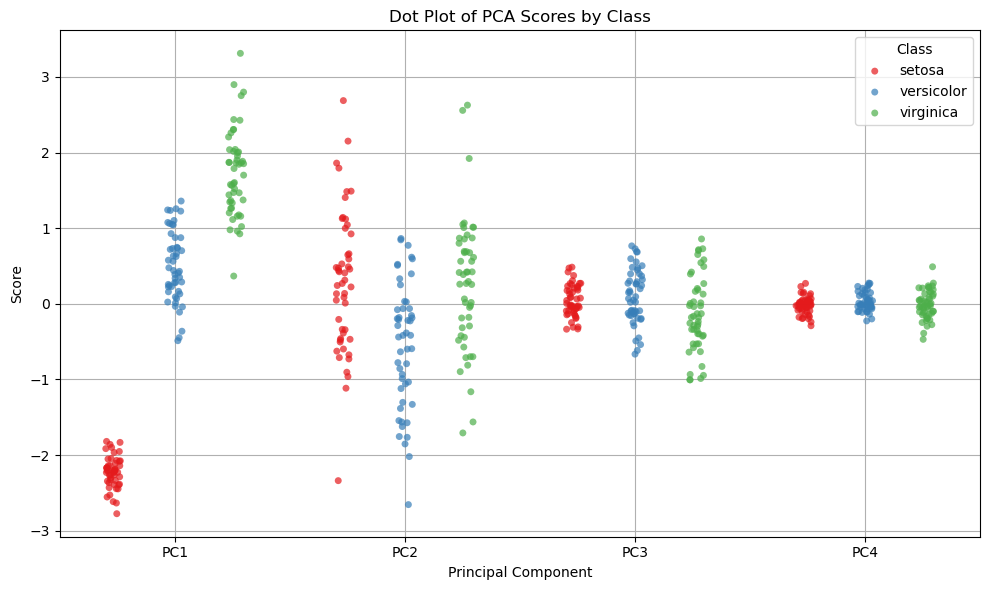

In [15]:
import seaborn as sns

# Melt PCA scores for dot plot
df_dotplot = df_pca.copy()
df_dotplot["sample"] = df_dotplot.index
df_long = pd.melt(
    df_dotplot,
    id_vars=["sample", "target"],
    value_vars=[f"PC{i+1}" for i in range(4)],
    var_name="Principal Component",
    value_name="Score"
)

# Plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_long,
    x="Principal Component",
    y="Score",
    hue="target",
    palette="Set1",
    jitter=True,
    dodge=True,
    alpha=0.7
)
plt.title("Dot Plot of PCA Scores by Class")
plt.legend(title="Class", labels=target_names)
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

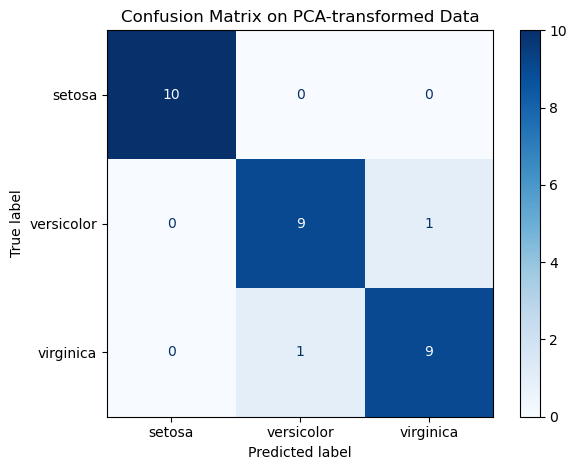

Overall Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Overall Accuracy: 0.9333333333333333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



<Figure size 600x500 with 0 Axes>

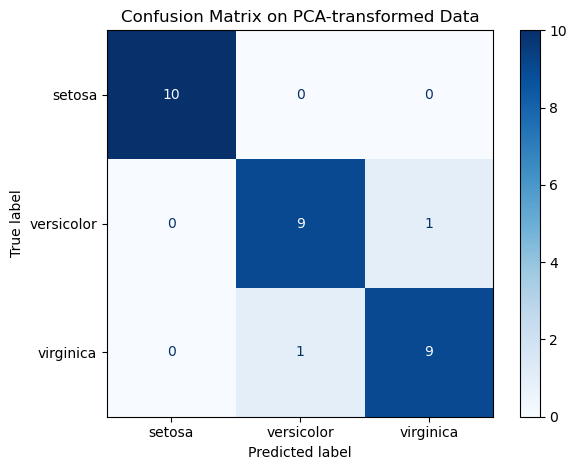

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# ========================
# Train a Classifier
# ========================
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ========================
# Predict & Confusion Matrix
# ========================
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

# ========================
# Plot Confusion Matrix
# ========================
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix on PCA-transformed Data")
plt.tight_layout()
plt.show()

# ========================
# Overall Classification Statistics
# ========================
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


# ========================
# Train-Test Split
# ========================
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# ========================
# Train a Classifier
# ========================
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ========================
# Predict & Confusion Matrix
# ========================
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
# ========================
# Overall Classification Statistics
# ========================
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix on PCA-transformed Data")
plt.tight_layout()
plt.show()


To assess classification performance, a multinomial logistic regression model was fitted using the principal component scores as predictors. The model achieved a high overall accuracy of 93.3%, with a strong Kappa statistic of 0.9, indicating substantial agreement beyond chance. Sensitivity and specificity for Setosa were perfect, while Versicolor and Virginica showed slightly reduced but still strong performance, with minor confusion between them.

In [19]:
disp 

In [18]:
cm 

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  9]])

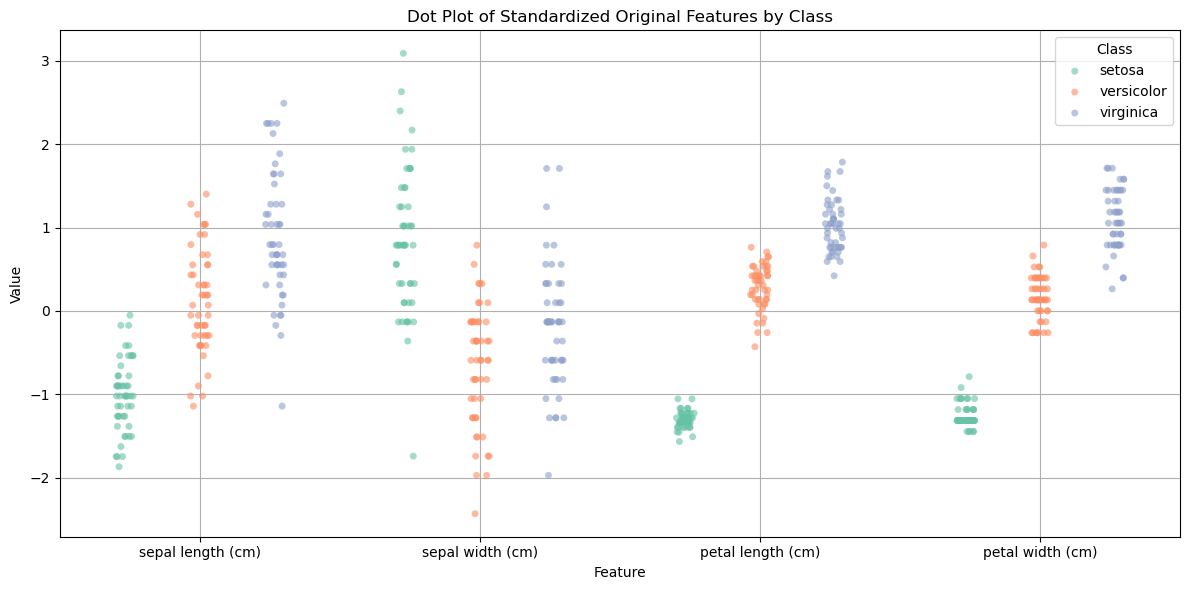

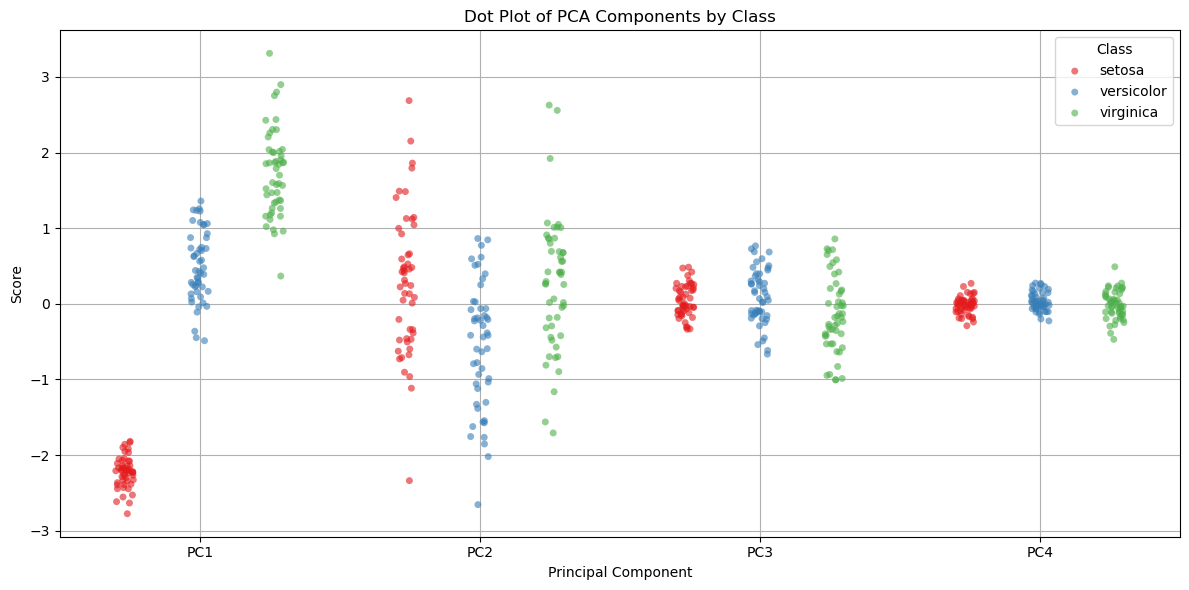

In [17]:
# ========================
# Dot Plot: Standardized Original Features
# ========================
df_scaled_plot = df_scaled.copy()
df_scaled_plot["sample"] = df_scaled_plot.index
df_scaled_plot["target"] = y
df_scaled_long = pd.melt(
    df_scaled_plot,
    id_vars=["sample", "target"],
    var_name="Feature",
    value_name="Value"
)

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_scaled_long,
    x="Feature",
    y="Value",
    hue="target",
    palette="Set2",
    jitter=True,
    dodge=True,
    alpha=0.6
)
plt.title("Dot Plot of Standardized Original Features by Class")
plt.legend(title="Class", labels=target_names)
plt.grid(True)
plt.tight_layout()
plt.show()

# ========================
# Dot Plot: PCA Components
# ========================
df_dotplot = df_pca.copy()
df_dotplot["sample"] = df_dotplot.index
df_long = pd.melt(
    df_dotplot,
    id_vars=["sample", "target"],
    value_vars=[f"PC{i+1}" for i in range(4)],
    var_name="Principal Component",
    value_name="Score"
)

plt.figure(figsize=(12, 6))
sns.stripplot(
    data=df_long,
    x="Principal Component",
    y="Score",
    hue="target",
    palette="Set1",
    jitter=True,
    dodge=True,
    alpha=0.6
)
plt.title("Dot Plot of PCA Components by Class")
plt.legend(title="Class", labels=target_names)
plt.grid(True)
plt.tight_layout()
plt.show()
